# A PyNets Primer in Python and Bash

Docker/Singularity containers are the preferable way to run PyNets, but for demonstration purposes, let's just begin with installation in a virtual environment and run the workflow manually on some example data. The scope of this particular tutorial will only cover single-subject workflows.

Although we will explore the package interactively in the code that follows, bear in mind that PyNets is a workflow, not a library like its core dependencies (Dipy, Nilearn, Nipype, Network). Thus, demonstrating its usage is much more of a command-line endeavor than the purely pythonic demos to which you may likely be accustomed. Because PyNets was deliberately designed to scale with supercomputers (but also run using just a couple cores on your laptop if needed), **systems-level** thinking and an awareness of issues relevant to distributed computing are fundamental to making the most of what PyNets has to offer. Most everything else, is automated.

Later tutorials will cover a variety of topics, much of which has been already documented with brief examples: https://pynets.readthedocs.io/en/latest/usage.html. Topic include: how you can deploy PyNets across entire BIDS datasets in a single command-line interface (CLI) call, benchmark and optimize connectome ensembles across diverse analytic scenarios with GridSearchCV integration, along with more advanced topics such as performing and visualizing multiplex graph analysis and embeddings of multimodal connectomes.

## Installation

In [2]:
%%bash

# Start a virtual environment and install some dependencies for our lesson.
pip install virtualenv --user
mkdir ~/virtualenvironment 2>/dev/null
virtualenv ~/virtualenvironment/pynets
cd ~/virtualenvironment/pynets/bin
source activate
./pip3 install -U gdown fury # for downloading data, running pynets, and some 3d viz
./pip3 install pynets=='0.9.997'

# The only GUI visualizer that I continue to use (personally) is fsleyes,
# which I find to be immensely intuitive, especially for fine-grained QC.
# But feel free to use an image viewer of your choice.
# For macs, download this link for fsleyes:
wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fsleyes/FSLeyes-latest-macos.tar.gz #for 2d viz
#rm -rf ~/virtualenvironment/FSLeyes.app
tar -xzvf FSLeyes-latest-macos.tar.gz -C ~/virtualenvironment
# For Linux, downnload the appropriate precompiled build from https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FSLeyes


Using base prefix '/usr/local/anaconda3'
New python executable in /Users/derekpisner/virtualenvironment/pynets/bin/python
Installing setuptools, pip, wheel...
done.
Requirement already up-to-date: gdown in /Users/derekpisner/virtualenvironment/pynets/lib/python3.7/site-packages (3.11.1)
Requirement already up-to-date: fury in /Users/derekpisner/virtualenvironment/pynets/lib/python3.7/site-packages (0.5.1)
  Attempting uninstall: pynets
    Found existing installation: pynets 0.9.995
    Uninstalling pynets-0.9.995:
      Successfully uninstalled pynets-0.9.995


--2020-07-02 21:53:15--  https://fsl.fmrib.ox.ac.uk/fsldownloads/fsleyes/FSLeyes-latest-macos.tar.gz
Resolving fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)... 129.67.248.65
Connecting to fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)|129.67.248.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 378058752 (361M) [application/x-gzip]
Saving to: ‘FSLeyes-latest-macos.tar.gz.7’

     0K .......... .......... .......... .......... ..........  0%  214K 28m45s
    50K .......... .......... .......... .......... ..........  0%  430K 21m32s
   100K .......... .......... .......... .......... ..........  0% 3.59M 14m55s
   150K .......... .......... .......... .......... ..........  0%  532K 14m4s
   200K .......... .......... .......... .......... ..........  0% 2.41M 11m45s
   250K .......... .......... .......... .......... ..........  0% 6.13M 9m57s
   300K .......... .......... .......... .......... ..........  0%  561K 10m6s
   350K .......... .......... .......... ..........

# Fetch sample preprocessed data

And now we can download a minimal dataset from OASIS that includes preprocessed, multimodal fMRI and dMRI data.

In [4]:
%%bash
## Normally, we could just use a dataset from datalad or from s3, which can be downloaded automatically if
## your AWS credentials are properly configured. See `pynets_cloud` CLI , with examples here:
## https://pynets.readthedocs.io/en/latest/usage.html#quickstart
## But to get a sufficiently versatile and preprocessed dataset of multimodal dMRI and rsfMRI data,
## we draw from a minimal example publicly hosted elsewhere for the sake of this demonstration.

# if  [ -d ~/Downloads/.pynets ]; then
#     rm -rf ~/Downloads/.pynets/test_oasis*
# else
#     mkdir ~/Downloads/.pynets
# fi

if  [ ! -f ~/Downloads/.pynets/test_oasis.tar.gz ]; then
    cd ~/Downloads/.pynets
    gdown https://drive.google.com/uc?id=1beEoc_Pdk6OBDYc80mBDTvUhcUny9Gu3 -O ~/Downloads/.pynets/test_oasis.tar.gz
else
    cd ~/Downloads/.pynets
fi

mkdir ~/Downloads/.pynets/derivatives/sub-OAS31172 2>/dev/null
tar -xzvf test_oasis.tar.gz -C derivatives/sub-OAS31172

x ses-d0407/func/sub-OAS31172_ses-d0407_task-rest_run-01_bold.nii.gz
x ses-d0407/anat/sub-OAS31172_ses-d0407_T2w.nii.gz
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-02_dwi.bval
x ses-d1717/swi/sub-OAS31172_ses-d1717_part-phase_GRE.json
x ses-d0407/anat/sub-OAS31172_ses-d0407_acq-TSE_T2w.json
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-02_dwi.bvec
x ses-d1717/swi/sub-OAS31172_ses-d1717_minIP.json
x ses-d1717/swi/sub-OAS31172_ses-d1717_swi.nii.gz
x ses-d1717/dataset_description.json
x ses-d0407/func/sub-OAS31172_ses-d0407_task-rest_run-02_bold.json
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-01_dwi.bval
x ses-d1717/swi/sub-OAS31172_ses-d1717_part-mag_GRE.nii.gz
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-01_dwi.bvec
x ses-d1717/func/sub-OAS31172_ses-d1717_task-rest_run-01_bold.json
x ses-d1717/anat/sub-OAS31172_ses-d1717_T2star.nii.gz
x ses-d0407/func/
x ses-d1717/swi/sub-OAS31172_ses-d1717_minIP.nii.gz
x ses-d1717/fmap/sub-OAS31172_ses-d1717_echo-1_run-01_fieldmap.nii.gz
x ses-d0407/dataset_

In [ ]:
%%bash
%%capture

# Get the absolute paths to files and directories we will use. The CLI's in PyNets do NOT accept relative paths.
dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`

# Now we create an output directory for the derivatives of the pipeline (if one doesn't exist already).
mkdir ~/Downloads/.pynets/output 2>/dev/null

# And now we construct a command-line call for a single subject from the data we just downloaded.
# Namely, for run 1 of session d0407 from subject OAS31172, lets sample an ensemble of 144 connectome
# estimates (1 models x 6 thresholds x 2 smoothing values x 2 high-pass filter thresholds x
# 3 atlases x 2 time-series extraction methods).
~/virtualenvironment/pynets/bin/pynets "$abs_dir"/.pynets/outputs -id OAS31172_d0407_1 -mod 'partcorr' -min_thr 0.20 -max_thr 0.80 -step_thr 0.10 -sm 0 4 -hp 0 0.028 -a 'BrainnetomeAtlasFan2016' 'atlas_harvard_oxford' 'destrieux2009_rois' -es 'mean' 'variance' -anat "$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/anat/sub-OAS31172_ses-d0407_run-01_T1w.nii.gz -func "$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/func/sub-OAS31172_ses-d0407_task-rest_run-01_bold.nii.gz -plug 'MultiProc' -work '/tmp/pynets_work' -mst -plt -embed 2> functional_connectometry_log.txt


# Viewing outputs

In [ ]:
%%bash
cd ~/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func
ls

tree

Lets do a bit of quality-control to ensure, for example, that the inverse warping of the Desikan Klein atlas from template-space to native T1w anatomical space is valid.

In [ ]:
%%bash
t1w_image=`ls /tmp/pynets_work/*/*/meta_wf_*/fmri_connectometry*/register_node/reg/imgs/*t1w_brain.nii.gz | head -1`
atlas_in_t1w_image=`ls /tmp/pynets_work/*_wf_single_subject_fmri*/wf_single_*/meta_wf_*/fmri_connectometry_*/_atlas_DesikanKlein2012/register_atlas_node/atlas_DesikanKlein2012/*_gm.nii.gz | head -1`

~/virtualenvironment/FSLeyes.app/Contents/*/fsleyes "$t1w_image" "$atlas_in_t1w_image" -cm 'random' &


The below multiplot depicts distributions of average graph topological metrics, calculated using Area-Under-the-Curve (AUC) across our window of multiple thresholds, for the ensemble of 96 connectomes sampled. As you can visually discern, topology varies considerably across estimates.

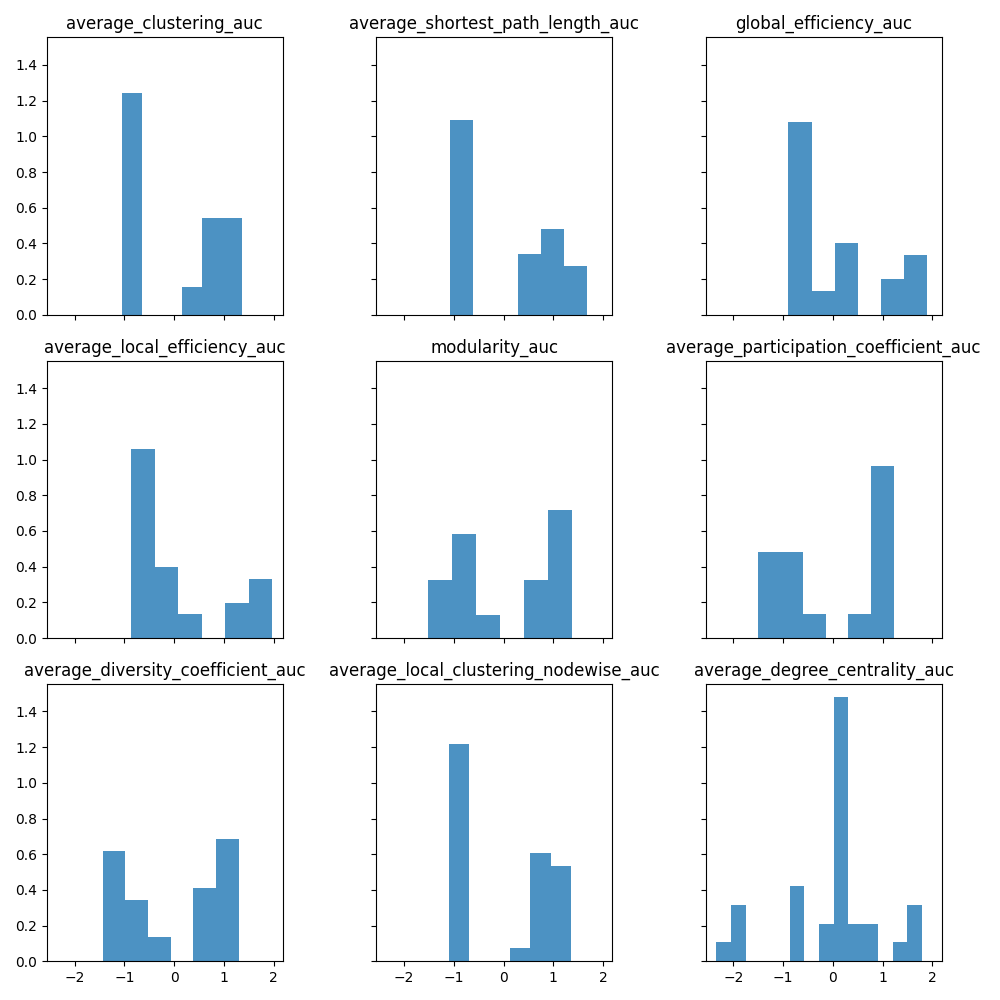

In [12]:
import glob
from IPython.display import Image
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/mean_global_topology_distribution_multiplot.png')[0])


In [ ]:
from IPython.display import Image
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/figures/sub-OAS31172_ses-d0407_run-1_modality-func_est-partcorr_nodetype-parc_smooth-4fwhm_hpass-0.028Hz_extract-variance_thr-0.2_glass_viz.png')[0])


Above is a glass brain depiction of all regions of the Desikan Klein 2012 atlas using a partial correlation estimator, 4 fwhm smoothing, 0.028Hz high-pass filter, based on variance of the node-extracted time-series, with 20% post-hoc thresholding using the Minimum-Spanning Tree (MST) method. The latter method serves as an anti-fragmentation device that ensures we can prevent isolated (i.e. disconnected) nodes that can violate certain graph theoretical assumptions.

In the visualization, node size conveys the level of node importance (smaller is lower eigenvector centrality) and node color corresponds to hierarchical Louvain community affiliation (5 distinct communities found).

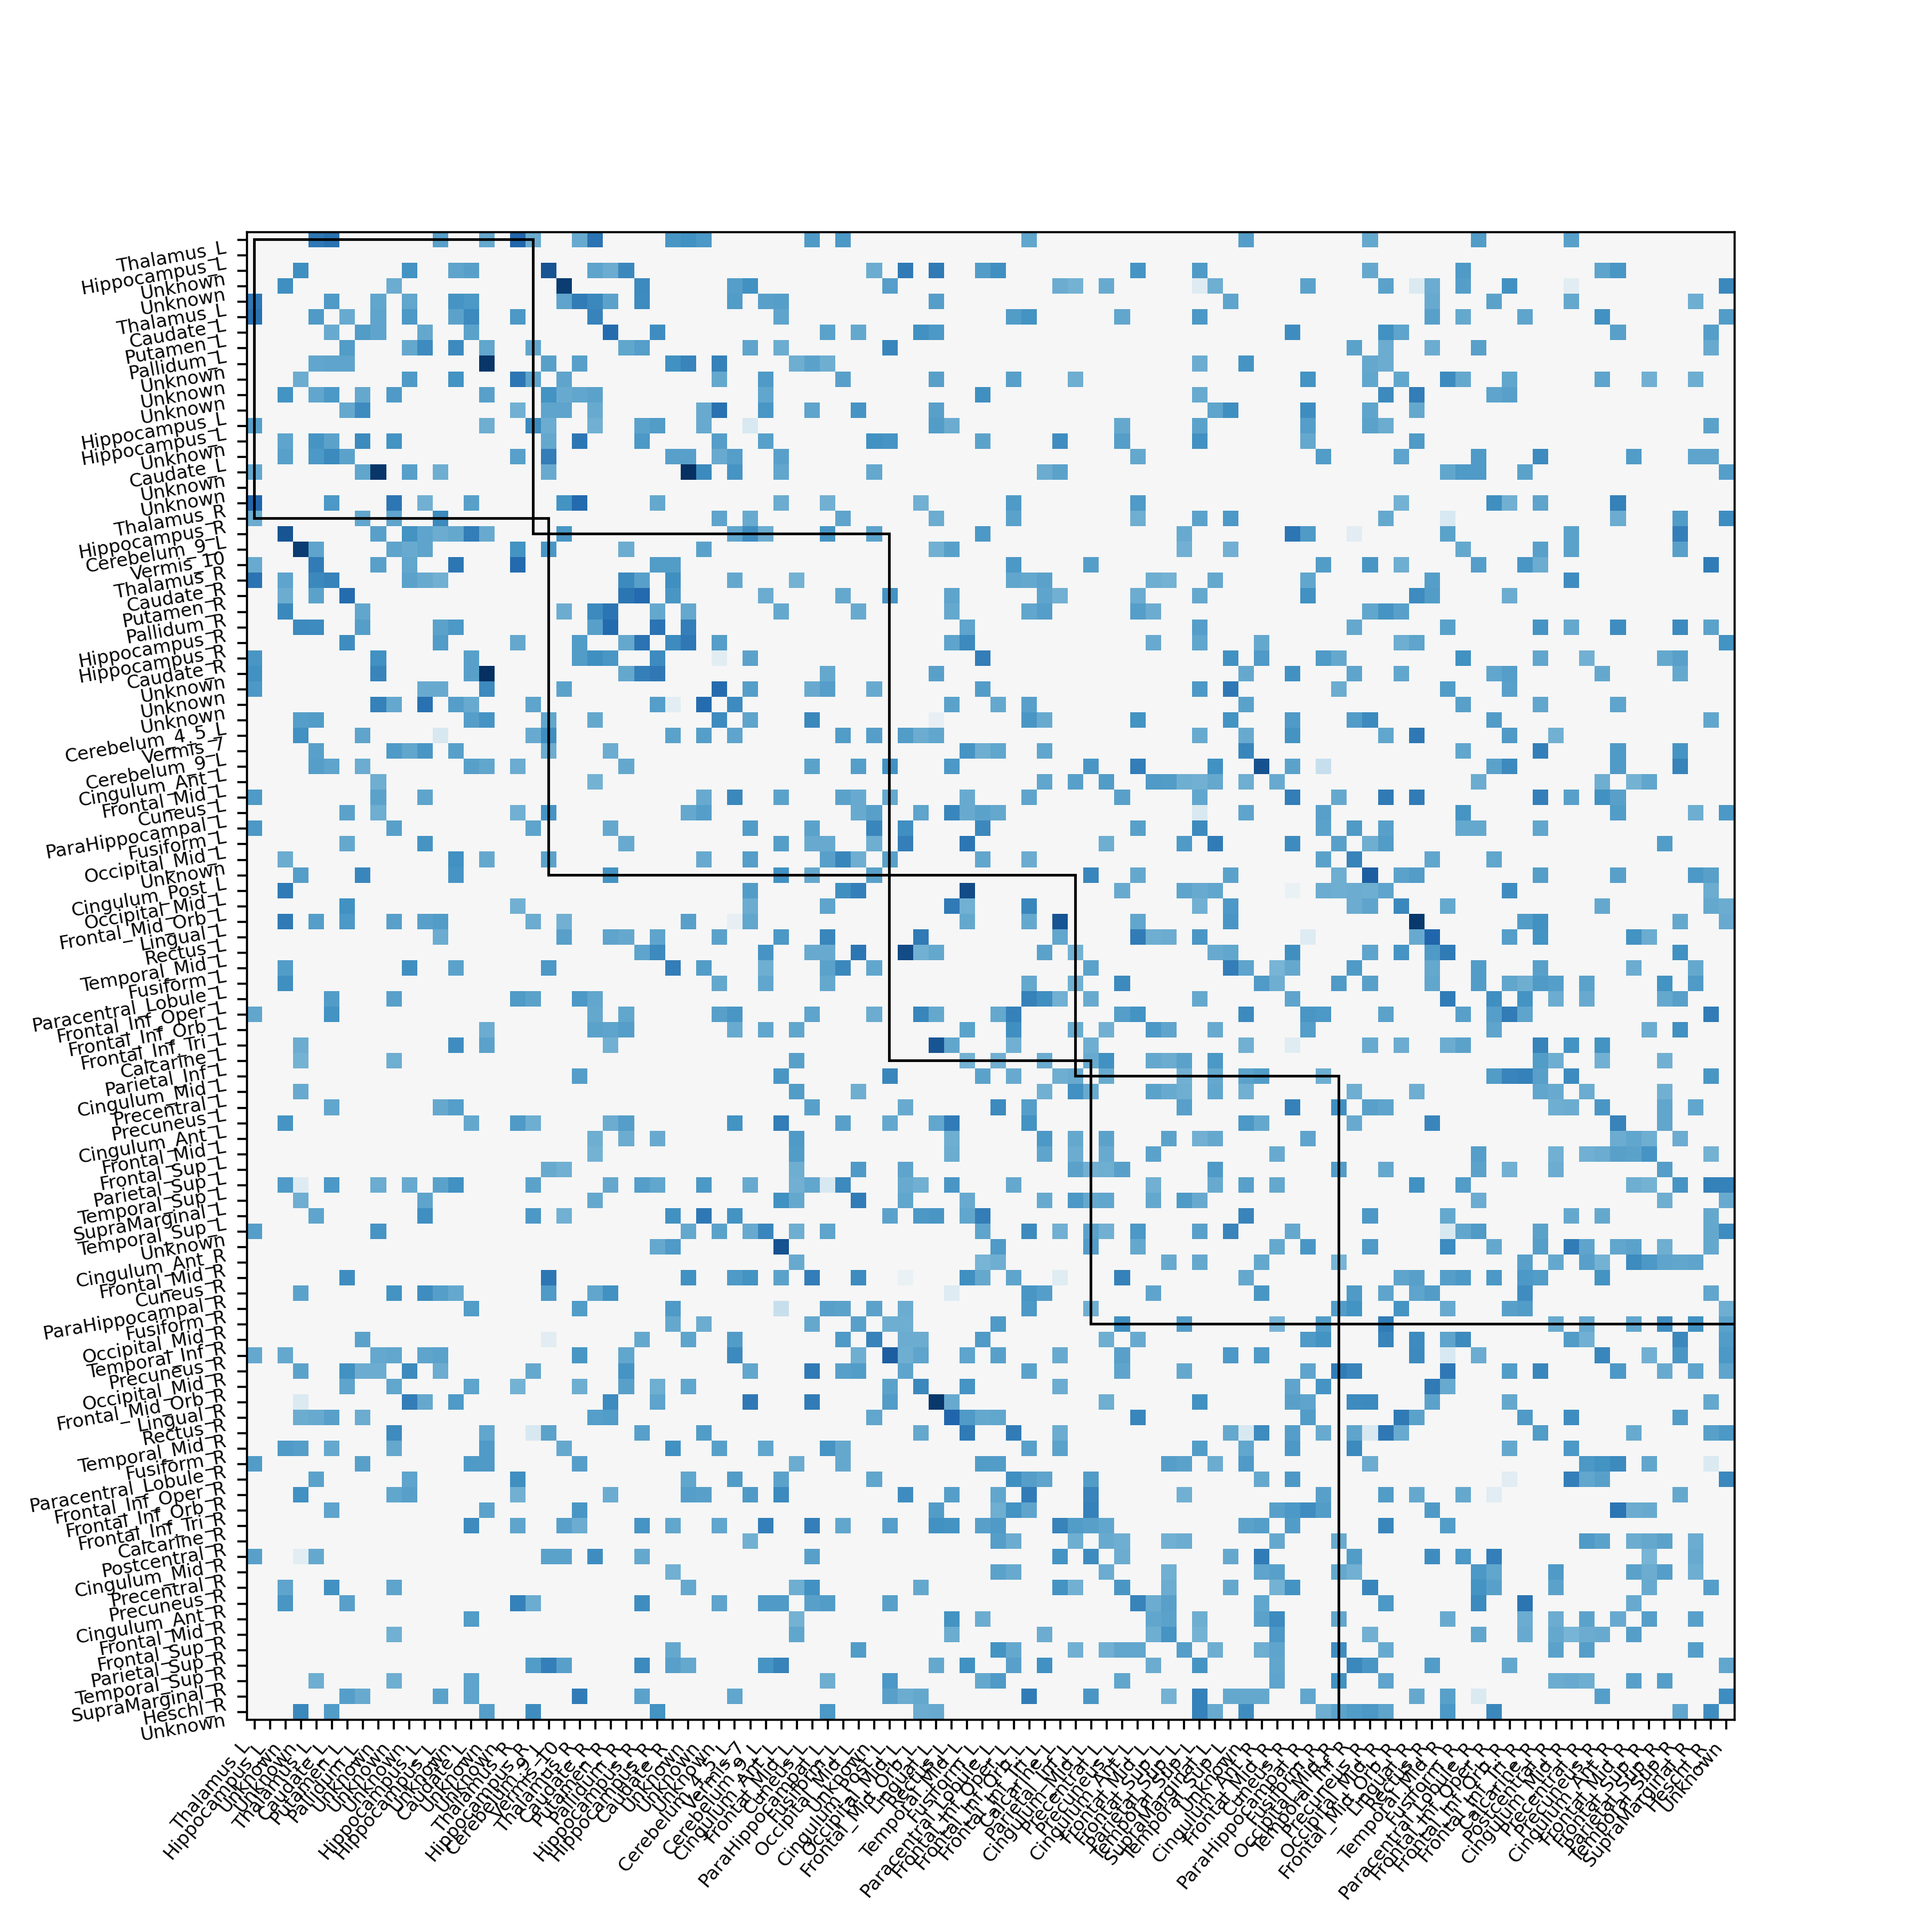

In [10]:
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/figures/sub-OAS31172_ses-d0407_run-1_modality-func_est-partcorr_nodetype-parc_smooth-4fwhm_hpass-0.028Hz_extract-variance__thr-0.2_adj_mat_comm.png')[0])


The above adjacency matrix depicts a single connectome estimate, with community affiliation. But we could also look at the mean connectome (i.e. across all 96 estimates) -- what we might from here on out refer to as an **omnetome** as well:

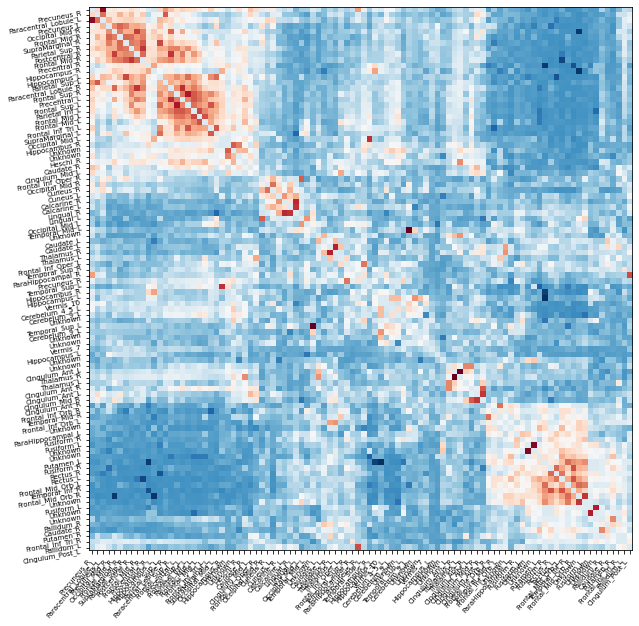

In [9]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from nilearn.plotting import plot_matrix
from pynets.core.thresholding import standardize
labels_path = glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/nodes/*labels.pkl')[0]

with open(labels_path, 'rb') as f:
    labels = pickle.load(f)

mats = [np.load(i) for i in glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/graphs/*.npy')]

mean_mat = standardize(np.mean(mats, axis=0))

plot_matrix(
    mean_mat,
    figure=(10, 10),
    labels=labels,
    vmax=np.abs(np.max(mean_mat)),
    vmin=0,
    reorder="average",
    auto_fit=True,
    grid=False,
    colorbar=False,
    cmap='RdBu_r',
)
plt.show()

As you can see, we get a much more information-rich graph. This graph, unlike the first, now represents a new *distribution* of connectomes, that, by virtue of its plurality of views, more exhaustively samples from the true *population* of networks in this individual that may exhibit connectivity, across the whole brain as a region of interest, at any point in time during the course of the 5-10 minute resting-state time-series.

# Collecting Outputs
So, we explored the outputs of our connectome ensemble visually, but let's take a closer look at our omnetome's topology. To do this, we run another workflow using the `pynets_collect` CLI, which collects the various graph topological metrics extracted from each of the connectome point estimates in our ensemble.

In [8]:
%%bash

dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`
pynets_collect -basedir "$abs_dir"/.pynets/outputs -modality 'func'



PyNets Version:
0.9.995


200701-11:35:46,176 nipype.workflow INFO:
	 Generated workflow graph: /tmp/work/pynets_out_collection/load_pd_dfs/graph.png (graph2use=colored, simple_form=True).

Running with {'n_procs': 4, 'memory_gb': 8, 'scheduler': 'mem_thread'}

200701-11:35:47,154 nipype.workflow INFO:
	 Workflow load_pd_dfs settings: ['check', 'execution', 'logging', 'monitoring']
200701-11:35:47,164 nipype.workflow INFO:
	 Running in parallel.
200701-11:35:47,167 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 8.00/8.00, Free processors: 4/4.
200701-11:35:48,167 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 7.80/8.00, Free processors: 3/4.
                     Currently running:
                       * load_pd_dfs.build_subject_dict_node
200701-11:35:49,512 nipype.workflow INFO:
	 [Node] Setting-up "load_pd_dfs.build_subject_dict_node" in "/private/tmp/work/pynets_out_collection/load_pd_dfs/_sub_su

In [13]:
import pathlib
from pathlib import Path
import pandas as pd

# Now we can load a dataframe of summary topological graph metrics for the run for this particular subject.
# Note that if we were to sample connectomes from multiple subjects, the previous pynets_collect CLI would
# simply append new rows to the dataframe per subject run.
p = str(Path('~').expanduser()) + '/Downloads/.pynets/outputs/all_subs_neat.csv'
df = pd.read_csv(p, index_col=False)
df

id  \
0  sub-OAS31172_ses-d0407   

   BrainnetomeAtlasFan2016_corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_betweenness_centrality_auc  \
0                                            0.00417                                                                                    

   BrainnetomeAtlasFan2016_corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_clustering_auc  \
0                                           0.338546                                                                        

   BrainnetomeAtlasFan2016_corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_degree_centrality_auc  \
0                                           0.199253                                                                               

   BrainnetomeAtlasFan2016_corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_diversity_coefficient_auc  \
0                                           0.423061                                                                                   

   BrainnetomeAtlasFan2016_corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_eigenvector_centrality_auc  \
0                                           0.057475                                                                                    

   BrainnetomeAtlasFan2016_corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_local_clustering_nodewise_auc  \
0                                           0.538298                                                                                       

   BrainnetomeAtlasFan2016_corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_local_efficiency_auc  \
0                                           1.523333                                                                              

   BrainnetomeAtlasFan2016_corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_participation_coefficient_auc  \
0                                           0.348434                                                                                       

   BrainnetomeAtlasFan2016_corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_shortest_path_length_auc  \
0                                           0.776377                                                                                  

   ...  \
0  ...   

   DesikanKlein2012_partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_clustering_auc  \
0                                           0.053335                                                                                  

   DesikanKlein2012_partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_degree_centrality_auc  \
0                                           0.199725                                                                                         

   DesikanKlein2012_partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_diversity_coefficient_auc  \
0                                           0.753636                                                                                             

   DesikanKlein2012_partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_eigenvector_centrality_auc  \
0                                           0.100238                                                                                              

   DesikanKlein2012_partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_local_clustering_nodewise_auc  \
0                                            0.23935                                                                                                 

   DesikanKlein2012_partcorr_nodetype-parc_smooth-4fwhm_hpass-0

# Structural Connectometry

In [ ]:
%%bash
%%capture

# Again, get the absolute paths to files and directories we will use.
# The CLI's in PyNets do NOT accept relative paths.
dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`

# And now we construct a command-line call for the same subject, but
# using their dMRI data instead. This time, we should ideally use a higher
# voxel resolution (1mm) since we are working with microstructure data,
# but this would increase runtime by ~4x which would be better saved
# for HPC environments. For demonstration purposes, we will therefore
# downsample our data slightly and work in 2mm voxel resolution.

# So, for run 1 of session d0407 from subject OAS31172, lets
# sample an ensemble of 48 connectome estimates (1 diffusion model
# type x 6 thresholds x 2 direction-getting methods x 2 minimum
# streamline length thresholds x 2 atlases.

~/virtualenvironment/pynets/bin/pynets "$abs_dir"/.pynets/outputs -mod 'csa' -min_thr 0.20 -max_thr 0.80 -step_thr 0.10 -dg 'det' 'prob' -ml 40 0 -a 'BrainnetomeAtlasFan2016' 'DesikanKlein2012' -anat ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/anat/sub-OAS31172_ses-d0407_run-01_T1w.nii.gz" -dwi ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/dwi/sub-OAS31172_ses-d0407_dwi.nii.gz" -bval ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/dwi/sub-OAS31172_ses-d0407_dwi.bval" -bvec ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/dwi/sub-OAS31172_ses-d0407_dwi.bvec" -id OAS31172_d0407_1 -plug 'MultiProc' -work '/tmp/pynets_work' -mst -plt -vox '2mm' -embed 2> structural_connectometry_log.txt


# Viewing outputs

In [ ]:
%%bash
cd ~/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi
ls
​
tree

Lets do a bit of quality-control to ensure, for example, that the inverse warping of the DesikanKlein 2012 atlas from template-space to native DWI anatomical space is valid.

In [ ]:
%%bash
t1w_dwi_image=`ls /tmp/pynets_work/*/*/meta_wf_*/dmri_connectometry*/register_node/dmri_reg/reg/imgs/t1w_in_dwi.nii.gz | head -1`
atlas_in_t1w_dwi_image=`ls /tmp/pynets_work/*_wf_single_subject_dmri*/wf_single_*/meta_wf_*/dmri_connectometry_*/_atlas_DesikanKlein2012/register_atlas_node/atlas_DesikanKlein2012/DesikanKlein2012_dwi_track.nii.gz | head -1`
density_map=`ls ~/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi/DesikanKlein2012/tractography/*.nii.gz | head -1`

~/virtualenvironment/FSLeyes.app/Contents/*/fsleyes "$t1w_dwi_image" "$atlas_in_t1w_dwi_image" -cm 'random' "$density_map" &

The below multiplot depicts distributions of average graph topological metrics, calculated using Area-Under-the-Curve (AUC) across our window of multiple thresholds, for the ensemble of 48 connectomes sampled. As you can visually discern, topology varies considerably across estimates.

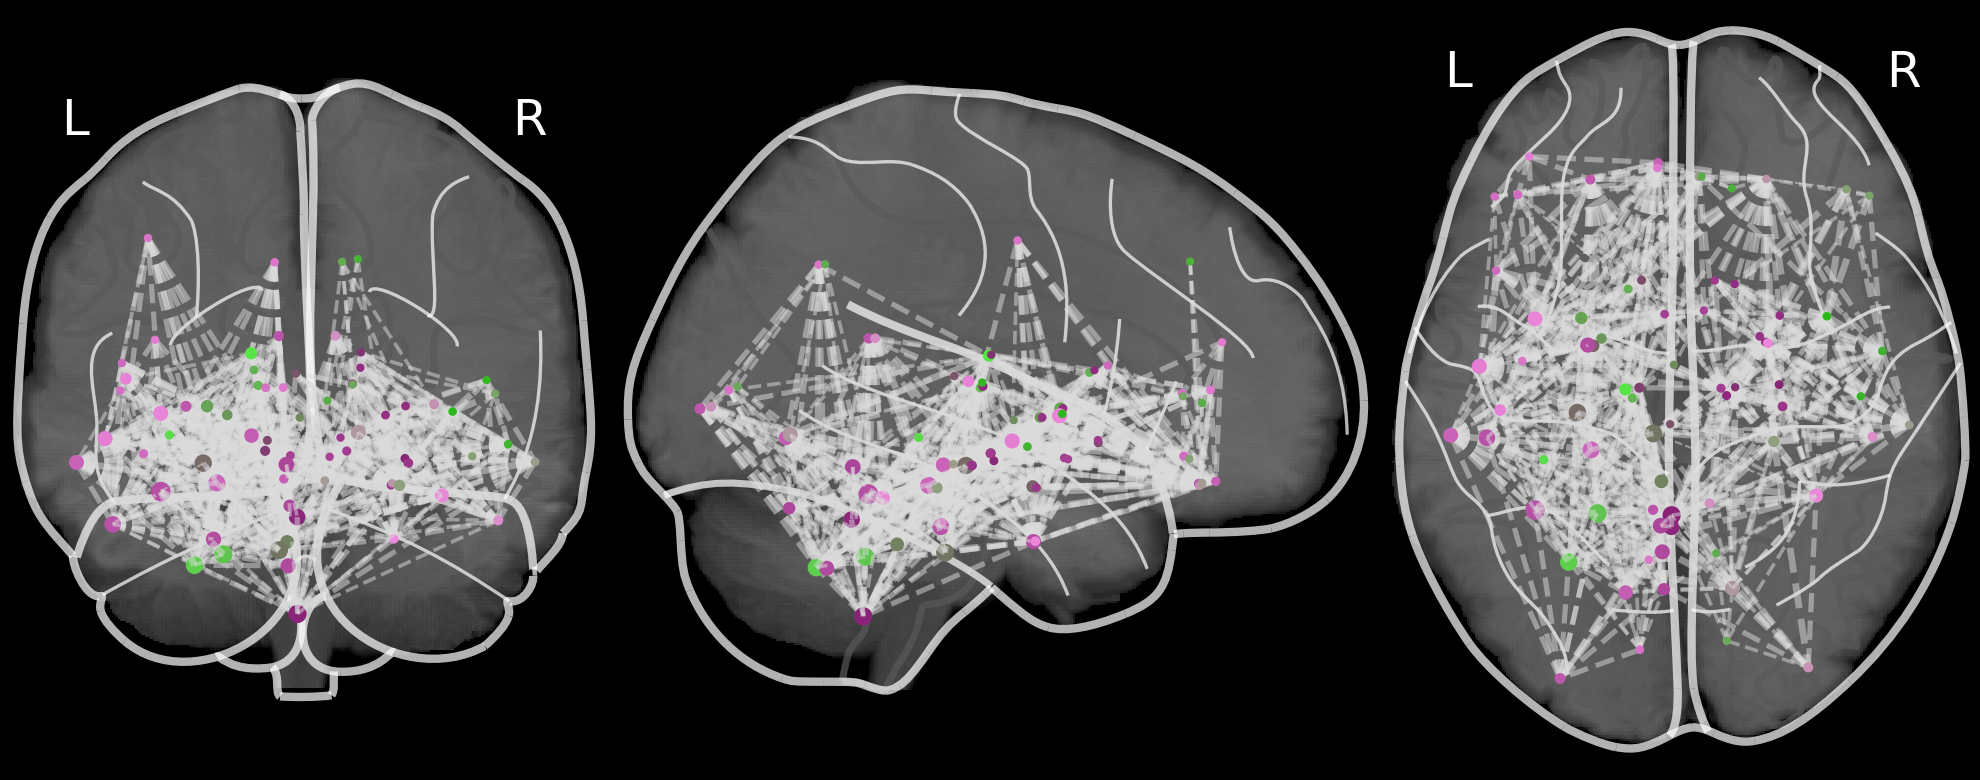

In [2]:
import glob
from IPython.display import Image
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi/DesikanKlein2012/figures/OAS31172_d0407_1_modality-dwi_est-ten_nodetype-parc_samples-10000streams_tt-local_dg-det_ml-20_thr-0.8_glass_viz.png')[0])

Above is a glass brain depiction of regions of the Desikan Klein 2012 atlas using a tensor model estimator of diffusion, deterministic tractography, a minimum fiber length threshold of 20, with 80% post-hoc thresholding using the Minimum-Spanning Tree (MST) method.
Again, un the visualization, node size conveys the level of node importance (smaller is lower eigenvector centrality) and node color corresponds to hierarchical Louvain community affiliation (only two distinct communities found). Unlike in the functional case, however, edges are here depicted with dotted white lines to differentiate them from functional edges, which carry a different meaning.

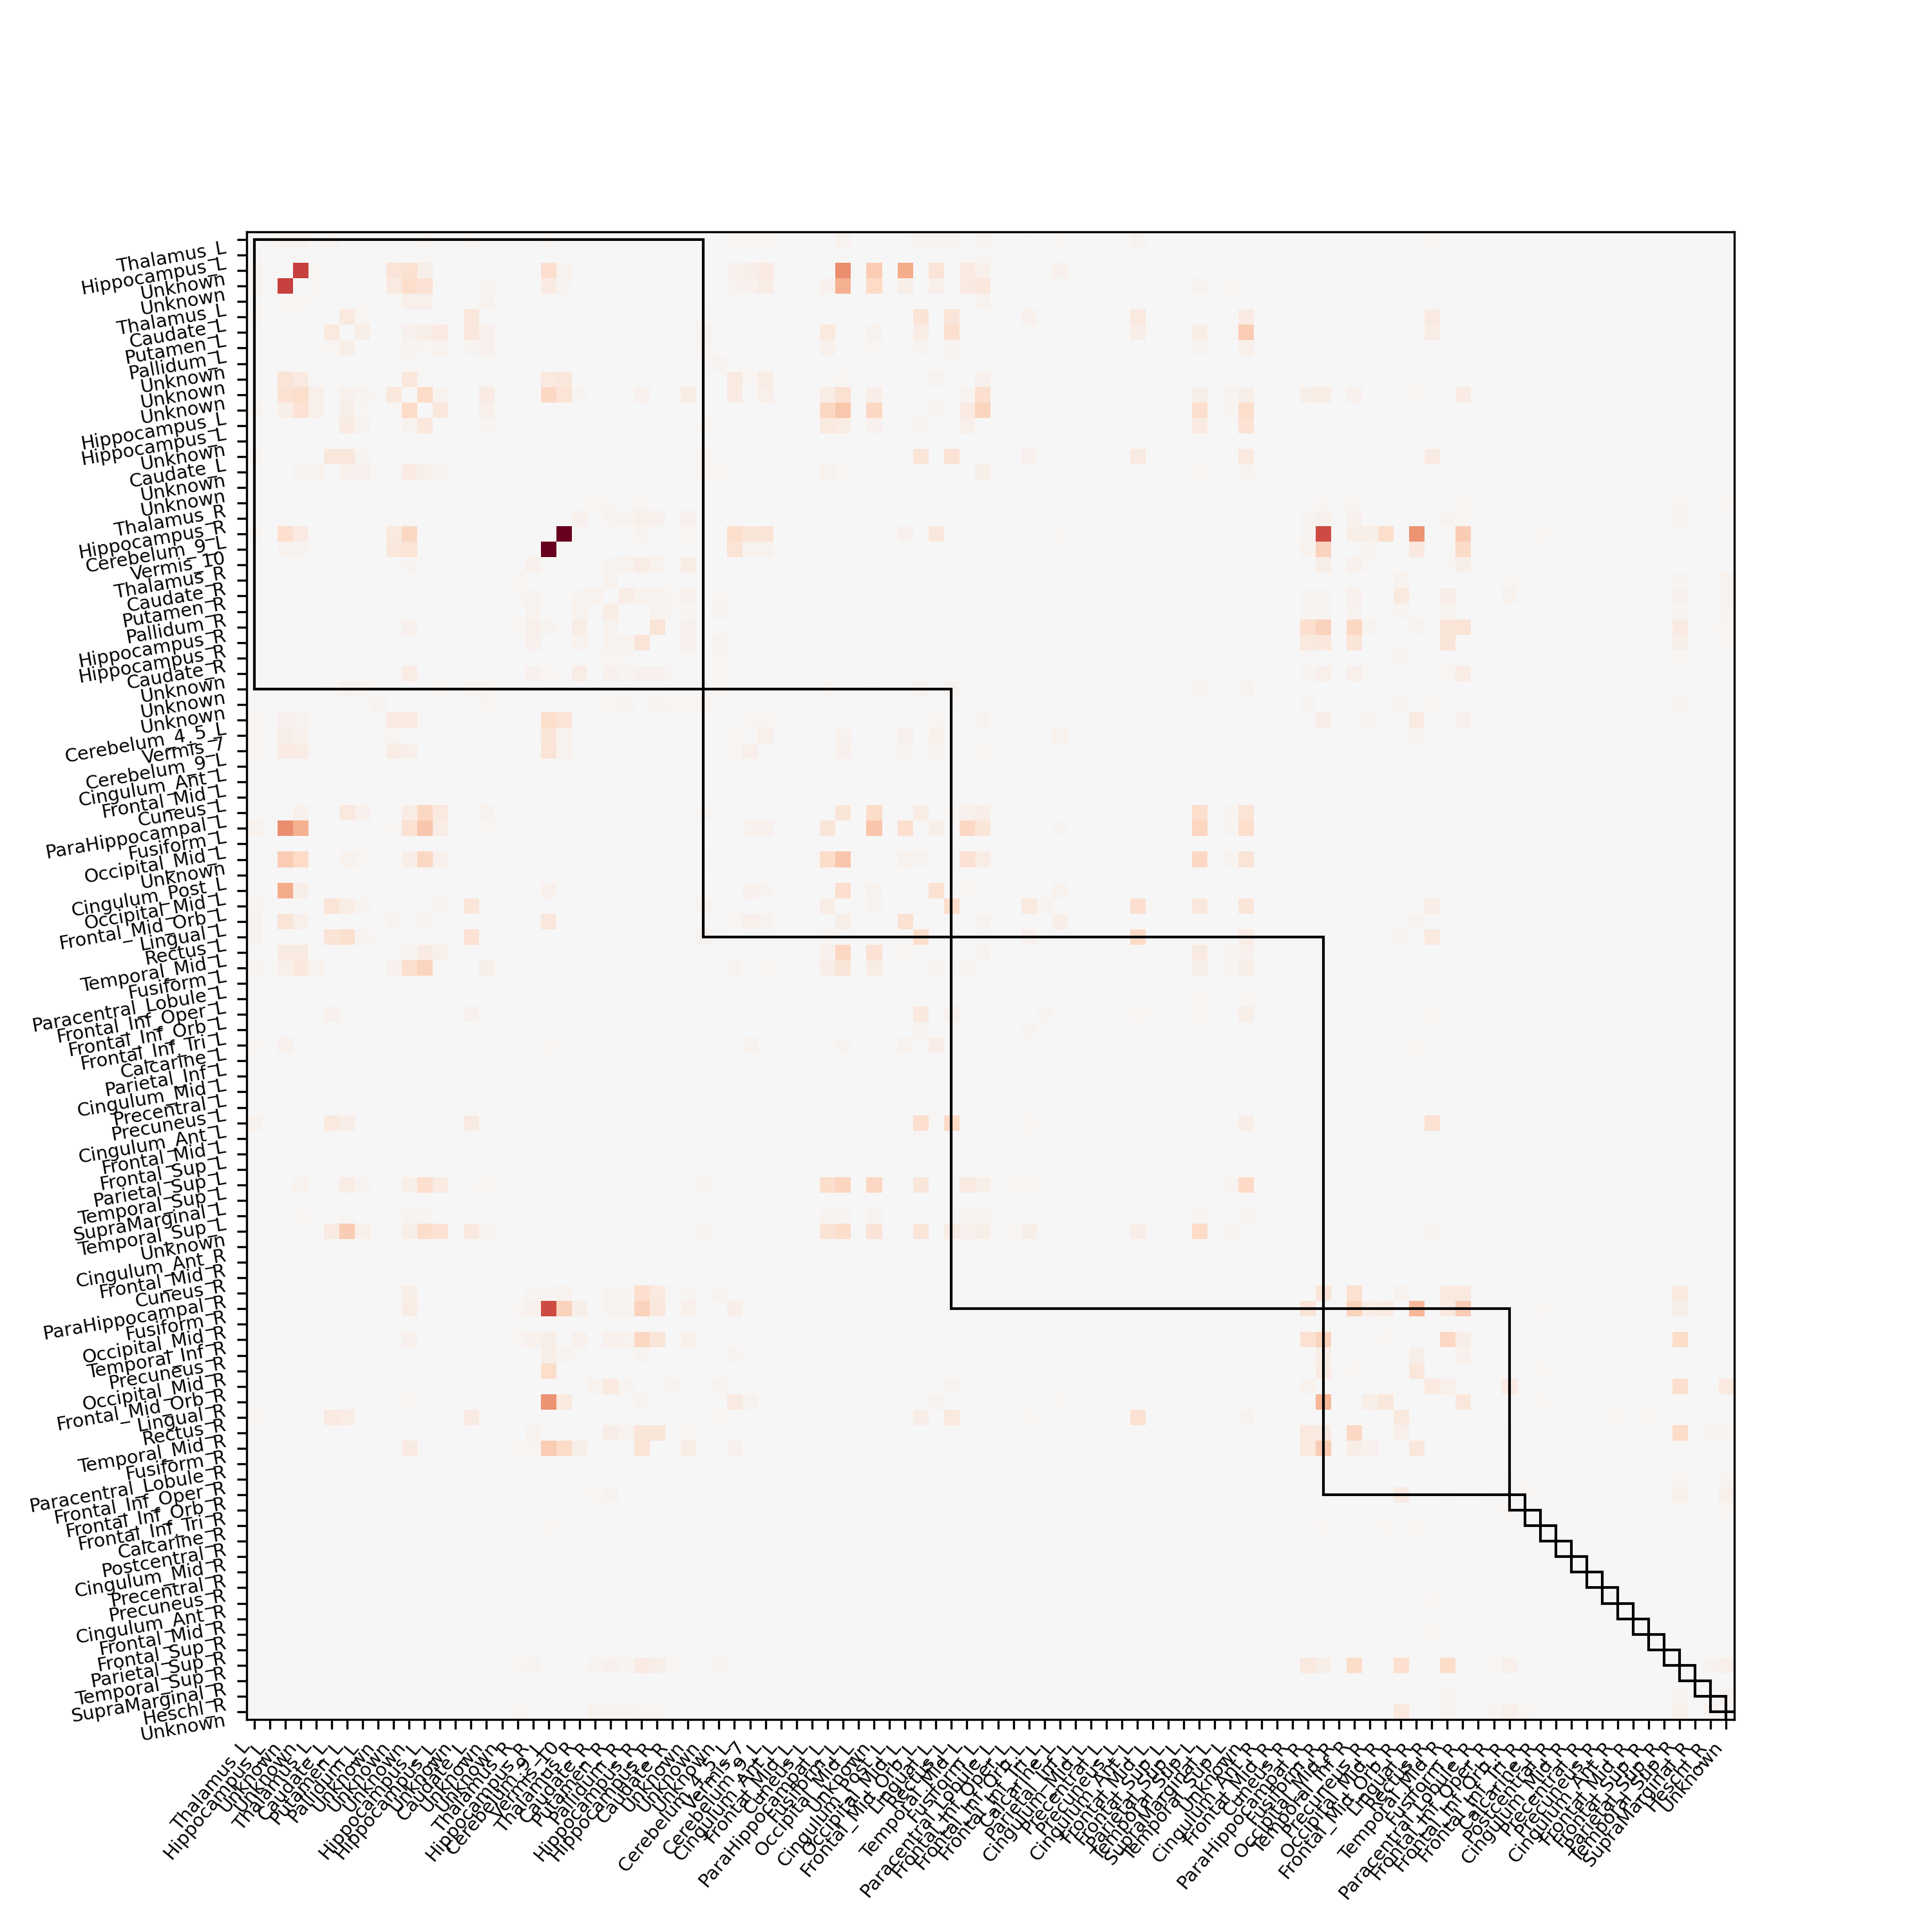

In [6]:
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi/DesikanKlein2012/figures/OAS31172_d0407_1_modality-dwi_est-csa_nodetype-parc_samples-10000streams_tt-local_dg-det_ml-0_thr-0.2_adj_mat_comm.png')[0])

The above adjacency matrix depicts a single connectome estimate, with community affiliation. But we could also look at a structural omnetome (i.e. based on FA-weighted fiber counts) across all 72 independent connectome estimations. Note that by default pynets only samples 50,000 streamlines whose endpoints intersect with at least two parcellation regions after all tissue/waymask/minimum-length filtering. This keeps runtimes down to <60 minutes for the complete structural connectometry pipeline. Bear in mind, however, that across our ensemble sample, we are **actually** sampling 50,000 x 48 = 2.4 million streamlines. And since we are further employing ensemble tractography, which samples across 5 step sizes (0.1, 0.2, 0.3, 0.4, 0.5) and 2 curvature thresholds (30, 40) by default, we are actually indirectly sampling across a much wider grid of parameters still.

Whereas in the functional connectometry case, we examined the mean connectome across estimates, here we might choose to examine the max connectome specifically, since structural connectomes are inherently sparser.

In [ ]:
import pickle
import glob
import numpy as np
from matplotlib import pyplot as plt
from nilearn.plotting import plot_matrix
from pynets.core.thresholding import standardize
labels_path = glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi/DesikanKlein2012/nodes/*labels.pkl')[0]

with open(labels_path, 'rb') as f:
    labels = pickle.load(f)

mats = [np.load(i) for i in glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/dwi/DesikanKlein2012/graphs/*.npy')]

max_mat = standardize(np.max(mats, axis=0))


plot_matrix(
    max_mat,
    figure=(10, 10),
    labels=labels,
    vmax=0.75*np.max(max_mat),
    vmin=0,
    reorder="average",
    auto_fit=True,
    grid=False,
    colorbar=False,
    cmap='RdBu_r',
)
plt.show()

As you can see, we get a much more information-rich graph. This graph, unlike the first, now represents a new *distribution* of connectomes, that, by virtue of its plurality of views, more exhaustively samples from the true *population* of networks in this individual that may exhibit connectivity, across the whole brain as a region of interest.

# Collecting Outputs
Now, we explored the outputs of our connectome ensemble visually, but let's take a closer look at the actual topological data. To do this, we run another workflow using the `pynets_collect` CLI.

In [ ]:
%%bash

dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`
pynets_collect -basedir "$abs_dir"/.pynets/outputs -modality 'dwi'